<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projeto Proposto 
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este projeto baseia-se na criação de um Modelo de Regressão para Previsão do Preço de Imóveis da Califórnia. </i>       
</p>  

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i>  Este projeto tem o intuito de ser um Modelo de Machine Learning para prever o preço de imóveis da Califórnia


</i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> 
</i> 
</p>  


https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [28]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.diagnostic import lilliefors

# Bibliotecas de Seleção de Modelos
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection

# Bibliotecas de Pré-Processamento e Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Bibliotecas de Modelos de Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

# Bibliotecas de Métricas de Machine Learning
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Parâmetros de Otimização
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

## Funções de Visualização

* Plota Barras 

In [2]:
def plota_barras(lista_variaveis, hue, df, linhas, colunas, titulo):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', hue = hue)
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], hue = hue)
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', color='#1FB3E5')
            ax.set_title(f'{titulo}')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = builtins.sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height,
                        f'{builtins.round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, builtins.max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(14, 7), sharey=True)
            fig.suptitle(f'{titulo}')
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = df, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = builtins.sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height,
                                f'{builtins.round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, builtins.max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [3]:
def plota_histograma(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        mediana = df[lista_variaveis[k]].median()
        media = df[lista_variaveis[k]].mean()
        plt.figure(figsize = (14, 5))
        ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', bins = 30)
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
        ax.set_ylabel(f'Frequência', fontsize = 14)
        ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.ticklabel_format(style='plain')
        plt.legend(loc = 'best')
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 5), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                mediana = df[lista_variaveis[k]].median()
                media = df[lista_variaveis[k]].mean().round()
                ax = sns.histplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], bins = 30)
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                ax.set_ylabel(f'Frequência', fontsize = 14)
                ax.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
                ax.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
                ax.ticklabel_format(style='plain')
                ax.legend(loc = 'best')
                k = k + 1

* Plota Boxplot

In [68]:
def plota_boxplot(lista_variaveis, df, linhas, colunas, titulo):
    if (linhas == 1) and (colunas == 1): 
        k = 0
        plt.figure(figsize = (14, 7))
        ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', orient = 'h')
        ax.set_title(f'{titulo}')
        ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
        ax.set_ylabel(f'Frequência', fontsize = 10)
        plt.show()
    elif linhas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}', fontsize = 10)
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[j], orient = 'h')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                ax.set_ylabel(f'Frequência', fontsize = 10)
                k = k + 1
    elif colunas == 1:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i], orient = 'h')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                ax.set_ylabel(f'Frequência', fontsize = 10)
                k = k + 1
    else:
        fig, axis = plt.subplots(linhas, colunas, figsize = (14, 7), sharey = True)
        fig.suptitle(f'{titulo}')
        k = 0
        for i in np.arange(linhas):
            for j in np.arange(colunas):
                ax = sns.boxplot(x = lista_variaveis[k], data = df, color = '#1FB3E5', ax = axis[i, j], orient = 'h')
                ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 10)
                ax.set_ylabel(f'Frequência', fontsize = 10)
                k = k + 1


* Plota Dispersão

In [5]:
def plota_dispersao(df, titulo,  x, y, metodo):
    plt.figure(figsize = (10, 5))
    sns.set(style = 'whitegrid')
    corr1 = str(df[[x, y]].corr(method = metodo).iloc[1, 0].round(2))
    sns.scatterplot(data = df, x = x, y = y, color = '#1FB3E5', sizes = 1, alpha = 0.50, marker = '.')
    plt.text(1, 1, f'Correlacao: {corr1}', fontsize = 12)
    plt.title(f'{titulo}', fontsize = 14)
    plt.xlabel(f'{x}', fontsize = 14)
    plt.ylabel(f'{y}', fontsize = 14)
    plt.ticklabel_format(style = 'plain')
    plt.grid(True, linestyle=':')
    sns.despine()
    plt.tight_layout()
    plt.show()

## Funções de Estatística

* Analisa Correlação

In [32]:
def analisa_correlacao(metodo, df):
    plt.figure(figsize=(14, 7))
    heatmap = sns.heatmap(df.corr(method=metodo), vmin=-1, vmax=1, cmap='magma', annot = True)
    heatmap.set_title(f"Analisando Correlação de {metodo}")
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.grid(False)
    plt.show()


* Analisa Normalidade 

In [7]:
def analisa_normalidade(amostra1, amostra2, variavel):

    normaltest_amostra = normaltest(amostra[variavel])
    if normaltest_amostra[1] < 0.05:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de que a variável "{variavel}" segue uma Distribuição Normal é REJEITADA!')
    else:
        print(f'Pelo Teste de Hipótese, A Hipótese Nula de  que a variável "{variavel}" segue uma Distribuição Normal é ACEITA')

    plt.figure(figsize = (14, 7))
    stats.probplot(amostra1[variavel], dist = 'norm', plot = plt)
    plt.title(f'Amostra 1', fontsize = 14)
    plt.grid(False)
    plt.box(False)
    plt.tight_layout()
    plt.show()

* Teste de Hipótese para Duas Amostras Independentes 

In [9]:
def teste_hipotese_duas_amostras_independentes(parametrico, amostra1, amostra2, variavel):
    media_amostra_1 = amostra1[variavel].mean()
    media_amostra_2 = amostra2[variavel].mean()
    mediana_amostra_1 = amostra1[variavel].median()
    mediana_amostra_2 = amostra2[variavel].median()

    if parametrico == True: 
        print(f'Média Amostra 1: {media_amostra_1}')
        print(f'Média Amostra 2: {media_amostra_2}')
        stat, p_value = ztest(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese Z, não há diferença significativa entre as médias da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese Z, há diferença significativa entre as médias da Amostra 1 e Amostra 2')
    else:
        print(f'Mediana Amostra 1: {mediana_amostra_1}')
        print(f'Mediana Amostra 2: {mediana_amostra_2}')
        stat, p_value = stats.mannwhitneyu(amostra1[variavel], amostra2[variavel]) 
        if p_value > 0.05:
            print(f'Pelo Teste de Hipótese de Mann Whitney, não há diferença significativa entre as medianas da Amostra 1 e Amostra 2')
        else:
            print(f'Pelo Teste de Hipótese de Mann Whitney, há diferença significativa entre as medianas da Amostra 1 e Amostra 2')

- Teste de Hipótese para Muitas Amostras Independentes 

In [10]:
def teste_hipotese_muitas_amostras_independentes(amostras, variavel):
    medianas = []
    
    for i, amostra in enumerate(amostras):
        mediana_amostra = amostra[variavel].median()
        medianas.append(mediana_amostra)
        print(f'Mediana Amostra {i+1}: {mediana_amostra}')

    stat, p_value = kruskal(*[amostra[variavel] for amostra in amostras])
    
    if p_value > 0.05:
        print(f'Pelo teste de Kruskal-Wallis, não há diferença significativa entre as medianas das amostras')
    else:
        print(f'Pelo teste de Kruskal-Wallis, há diferença significativa entre as medianas das amostras')


## Funções de Métricas ou Avaliação 

- Métricas 

In [13]:
def metricas_regressao(regressor, target, y_train, y_predict_train, y_test, y_predict_test, coeficiente_det_train, coeficiente_det_test):
    mae_train = mean_absolute_error(y_predict_train, y_train)
    mse_train = mean_squared_error(y_predict_train, y_train)
    rmse_train = np.sqrt(mean_squared_error(y_predict_train, y_train))
    metricas_treino = pd.DataFrame({'R2':coeficiente_det_train, 'MAE':mae_train, 'RMSE':rmse_train, 'Etapa':'treino', 'Regressor':regressor}, index = np.arange(1, 2))
    
    mae_test = mean_absolute_error(y_predict_test, y_test)
    mse_test = mean_squared_error(y_predict_test, y_test)
    rmse_test = np.sqrt(mean_squared_error(y_predict_test, y_test))
    metricas_teste = pd.DataFrame({'R2':coeficiente_det_test, 'MAE':mae_test, 'RMSE':rmse_test, 'Etapa':'teste', 'Regressor':regressor}, index = np.arange(1, 2))
    
    metricas_finais = pd.concat([metricas_treino, metricas_teste])

    return metricas_finais

* Validação Cruzada 

In [15]:
def validacao_cruzada_regressao(regressor, x_train, y_train, n_splits):

    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    models = {
        'Regressão Linear': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            LinearRegression()
        ),
        'KNN Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            KNeighborsRegressor(n_neighbors=5)
        ),
        'SVR Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            SVR(kernel='linear')
        ),
        'Random Forest Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
                ]),
            RandomForestRegressor(random_state=42, n_estimators=100, max_depth=5)
        )
    }

    if regressor in models:
        model = models[regressor]
    else:
        print('Utilize Regressão Linear, KNN Regressor, SVR Regressor, Random Forest Regressor como opções de Regressor!')
    
    scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']
    scores = cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring, return_train_score=False)
    
    metricas_finais = pd.DataFrame({
        'R2': scores['test_r2'].mean(),
        'MAE': -scores['test_neg_mean_absolute_error'].mean(),
        'RMSE': np.sqrt(-scores['test_neg_mean_squared_error'].mean()),
        'Etapa': 'validacao_cruzada',
        'Regressor': regressor
    }, index=[1])
    
    return metricas_finais


- Junção de Matrizes 

In [16]:
def metricas_regressao_modelos_juntos(lista_modelos):
    metricas_modelos = pd.concat(lista_modelos).set_index('Regressor')
    return metricas_modelos

## Funções de Machine Learning 

* Separa entre Features e Target 

In [17]:
def separa_feature_target(target, dados):
    x = dados.drop(target, axis = 1)
    y = dados[[target]]

    return x, y


- Separa entre Treino e Teste 

In [18]:
def separa_treino_teste(target, dados, size):
    x = dados.drop(target, axis = 1)
    y = dados[target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, random_state = 42)

    df_train = pd.concat([x_train, y_train], axis = 1)
    df_test = pd.concat([x_test, y_test], axis = 1)

    return df_train, df_test

- Discretização

In [19]:
def discretiza_variavel(df, variavel_quant, variavel_qualit, bins, labels, right):
    df[variavel_qualit] = pd.cut(
        df[variavel_quant], 
        bins= bins, 
        labels= labels, 
        right = right
    )
    df.drop(variavel_quant, axis = 1, inplace = True)

- Regressor 

In [20]:
def Regressor(regressor, x_train, y_train, x_test, y_test):

    qualitativas_numericas = [column for column in x_train.columns if x_train[column].nunique() <= 5]
    discretas = [column for column in x_train.columns if (x_train[column].nunique() > 5) and (x_train[column].nunique() <= 50)]
    continuas = [column for column in x_train.columns if x_train[column].nunique() > 50]

    models = {
        'Regressão Linear': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            LinearRegression()
        ),
        'KNN Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            KNeighborsRegressor(n_neighbors=5)
        ),
        'SVR Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            SVR(kernel='linear')
        ),
        'Random Forest Regressor': make_pipeline(
            ColumnTransformer([
                ('qualitativas_numericas', make_pipeline(SimpleImputer(strategy='constant')), qualitativas_numericas),
                ('discretas', make_pipeline(SimpleImputer(strategy='median')), discretas),
                ('continuas', make_pipeline(SimpleImputer(strategy='median')), continuas)
            ]),
            RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
        )
    }

    if regressor in models:
        model = models[regressor]
    else:
        print('Utilize Regressão Linear, KNN Regressor, SVR Regressor, Random Forest Regressor como opções de Regressor!')

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    coeficiente_det_train = r2_score(y_train, y_pred_train)
    coeficiente_det_test = r2_score(y_test, y_pred_test)

    residuos_train = y_train - y_pred_train
    residuos_test = y_test - y_pred_test

    return model, y_pred_train, y_pred_test, coeficiente_det_train, coeficiente_det_test, residuos_train, residuos_test


- Cálculo da Inércia 

In [22]:
def elbow_method(data, features):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features].values.reshape(-1, 1))
    wcss = []
    
    for n_clusters in np.arange(1, 11):
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(padronizado)
        wcss.append(kmeans.inertia_)
    
    plt.plot(np.arange(1, 11), wcss, marker='o', color = 'red')
    plt.xlabel('Número de clusters')
    plt.ylabel('Soma dos quadrados intra-cluster (WCSS)')
    plt.title('Método Elbow')
    plt.show()


* Algoritmo de Clusterização

In [23]:
def kmeans_esc(data, features, n_clusters):
    scaler = StandardScaler()
    padronizado = scaler.fit_transform(data[features].values.reshape(-1, 1))
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, max_iter=300)
    kmeans = kmeans.fit(padronizado)
    
    return kmeans.labels_


* Reordenando Clusters

In [ ]:
def ordenador_de_cluster(metodo_cluster, variavel, ordem, dados):

    media_cluster = dados.groupby(metodo_cluster, as_index = False)[variavel].mean()
    score_cluster = media_cluster.sort_values(by = variavel, ascending = ordem)
    score_cluster['index'] = media_cluster.index 

    df_final = dados.merge(score_cluster[[metodo_cluster, 'index']], on = metodo_cluster)
    df_final.drop(metodo_cluster, axis = 1, inplace = True)
    df_final.rename({'index':metodo_cluster}, axis = 1, inplace = True)


    return df_final


# <font color='red' style='font-size: 40px;'> 1) Entendimento da Base de Dados </font>
<hr style='border: 2px solid red;'>

### 1.1) Descrição das Variáveis

- The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are pretty self-explanatory:

> 1. 'Median House Value' : Valor mediano da casa para famílias dentro de um quarteirão de casas (medido em dólares americanos) [$]

> 2. 'Median Income':Renda mediana para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos) [10k$]

> 3. 'Median Age': Idade mediana de uma casa dentro de um quarteirão; um número menor é um prédio mais novo [anos]

> 4. 'Tot Rooms': Número total de quartos dentro de um quarteirão
 
> 5. 'Tot Bedrooms': Número total de quartos dentro de um quarteirão
 
> 6. 'Population': Número total de pessoas que residem em um quarteirão
 
> 7. 'Households': Número total de domicílios (um grupo de pessoas que residem em uma unidade domiciliar) por quarteirão

> 8. 'Distance to coast': Distância ao ponto de costa mais próximo [m]
 
> 9. 'Distance to Los Angeles': Distância ao centro de Los Angeles [m]
 
> 10. 'Distance to San Diego': Distância ao centro de San Diego [m]
 
> 11. 'Distance to San Jose': Distância ao centro de São José [m]
 
> 12. 'Distance to San Francisc': Distância ao centro de São Francisco [m]

### 1.2) Informações Inicais

In [24]:
df = pd.read_csv('../04_modelo_previsao_preco_imoveis/data/California_Houses.csv')
print(df.shape)
print(df.dtypes)
display(df.head())

(20640, 12)
Median_House_Value          float64
Median_Income               float64
Median_Age                    int64
Tot_Rooms                     int64
Tot_Bedrooms                  int64
Population                    int64
Households                    int64
Distance_to_coast           float64
Distance_to_LA              float64
Distance_to_SanDiego        float64
Distance_to_SanJose         float64
Distance_to_SanFrancisco    float64
dtype: object


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.00,8.33,41,880,129,322,126,9263.04,556529.16,735501.81,67432.52,21250.21
1,358500.00,8.30,21,7099,1106,2401,1138,10225.73,554279.85,733236.88,65049.91,20880.60
2,352100.00,7.26,52,1467,190,496,177,8259.09,554610.72,733525.68,64867.29,18811.49
3,341300.00,5.64,52,1274,235,558,219,7768.09,555194.27,734095.29,65287.14,18031.05
4,342200.00,3.85,52,1627,280,565,259,7768.09,555194.27,734095.29,65287.14,18031.05


# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória </font>
<hr style='border: 2px solid red;'>

### 2.1) Separando em Treino e Teste

> 1. Antes de qualquer análise ou tratamento, deve-se separar em Treino e Teste

> 2. Isso é importante para simular dados em produção e evitar o Data Leakage



In [25]:
df_train = separa_treino_teste('Median_House_Value', df, 0.25)[0]
df_test = separa_treino_teste('Median_House_Value', df, 0.25)[1]

### 2.2) Análise de Correlação 

> 1. Escolheu-se a Correlação de Spearman pois ela mostra relações lineares e não-lineares entre a Target e as Features

> 2. Através dela, nota-se que o valor da casa aparenta ser maior quando a renda da família é mais alta

> 3. Nota-se também que a casa aparenta perder valor conforme fica mais longe da costa/praia.

> 4. Percebe-se também que o número de quartos e cômodos é maior para casas mais populosas, entretanto, isso não aparenta influenciar muito no preço das casas

> 5. Finalmente, viu-se que as distâncias entre LA e San Diego e San Jose e San Francisco são inversamente proporcionais, portanto, moradias perto de LA e San Diego são longe de San Jose e San Francisco

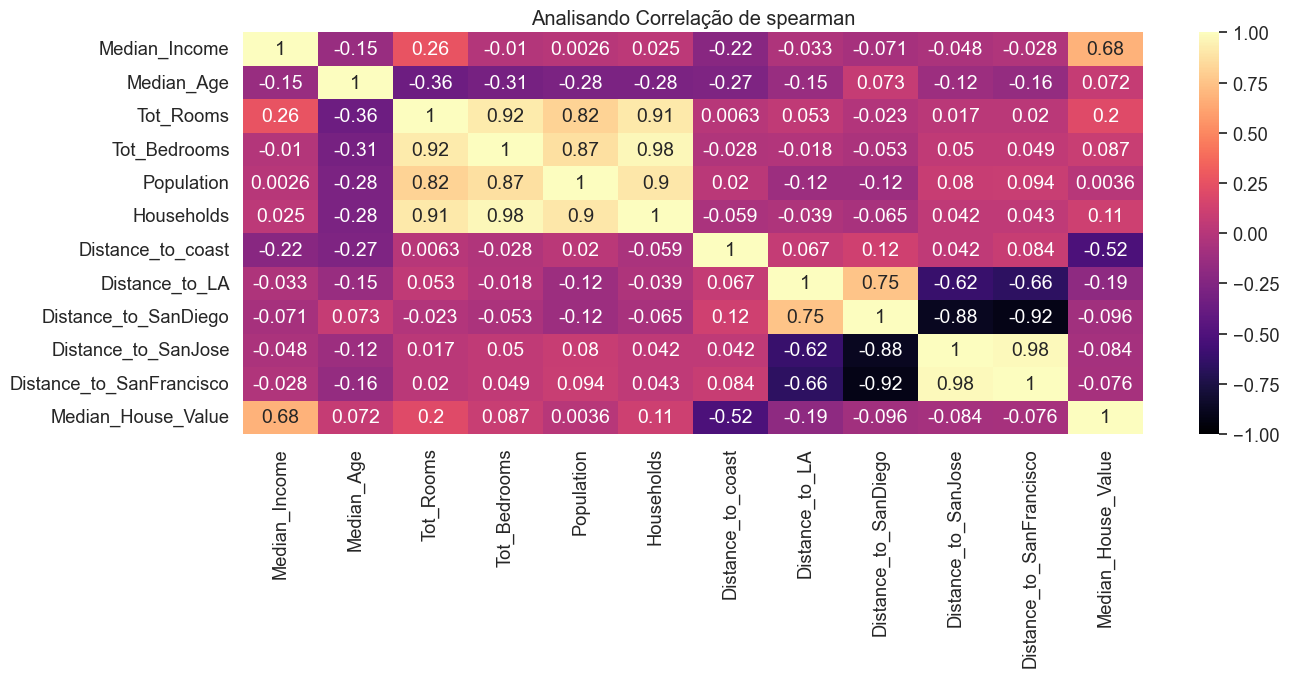

In [33]:
analisa_correlacao('spearman', df_train)

### 2.3) Análise das Distribuições 

> 1. A Target aparenta ter uma distribuição assimétrica para a esquerda, contudo, possui alguns Outliers

> 2. Há Outliers também na renda familiar e distância até a costa, indicando que há famílias com rendas altas e famílias que moram realmente muito longe da costa

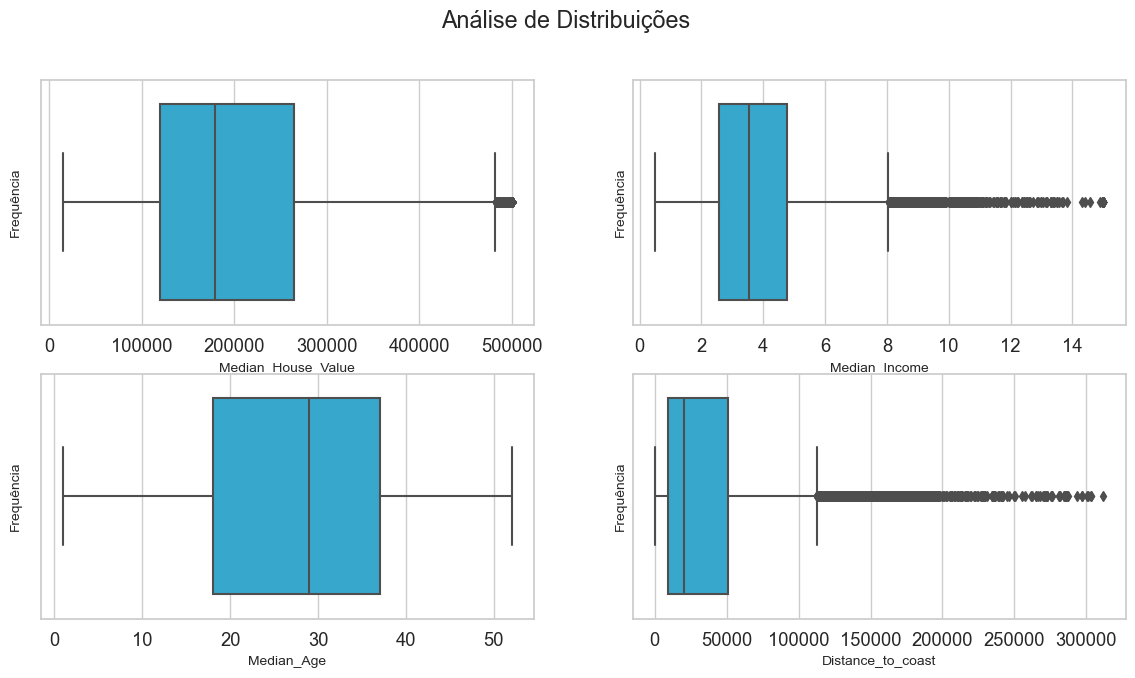

In [71]:
plota_boxplot(['Median_House_Value', 'Median_Income',
 'Median_Age', 'Distance_to_coast'], df_train, 2, 2, 'Análise de Distribuições')

> 1. Em relação as variáveis sobre as residências, de fato há muitos Outliers, indicando que há residências com alta concentração de moradores

> 2. Também pode significar ruído, logo, devemos nos atentar a esses pontos pois podem prejudicar o processo de modelagem 

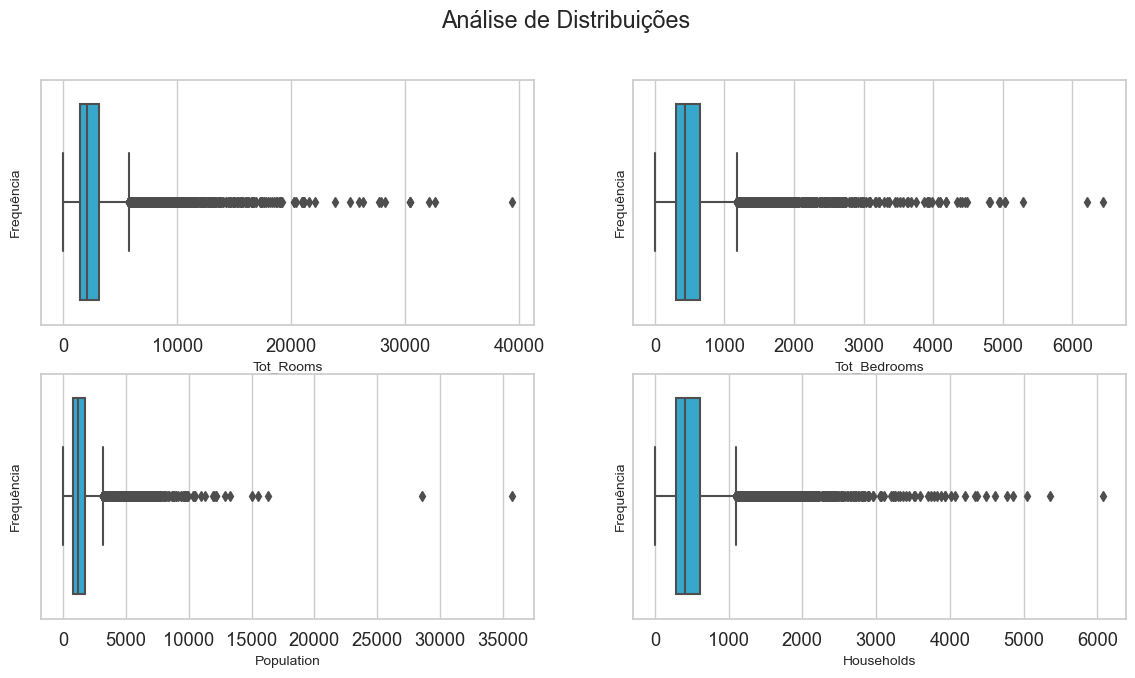

In [70]:
plota_boxplot(['Tot_Rooms','Tot_Bedrooms','Population','Households'], df_train, 2, 2, 'Análise de Distribuições')

> 1. Em relação as distâncias, nota-se que há mais casas perto de Los Angeles e San Diego, bem como mais casas longe de San Jose e San Francisco 

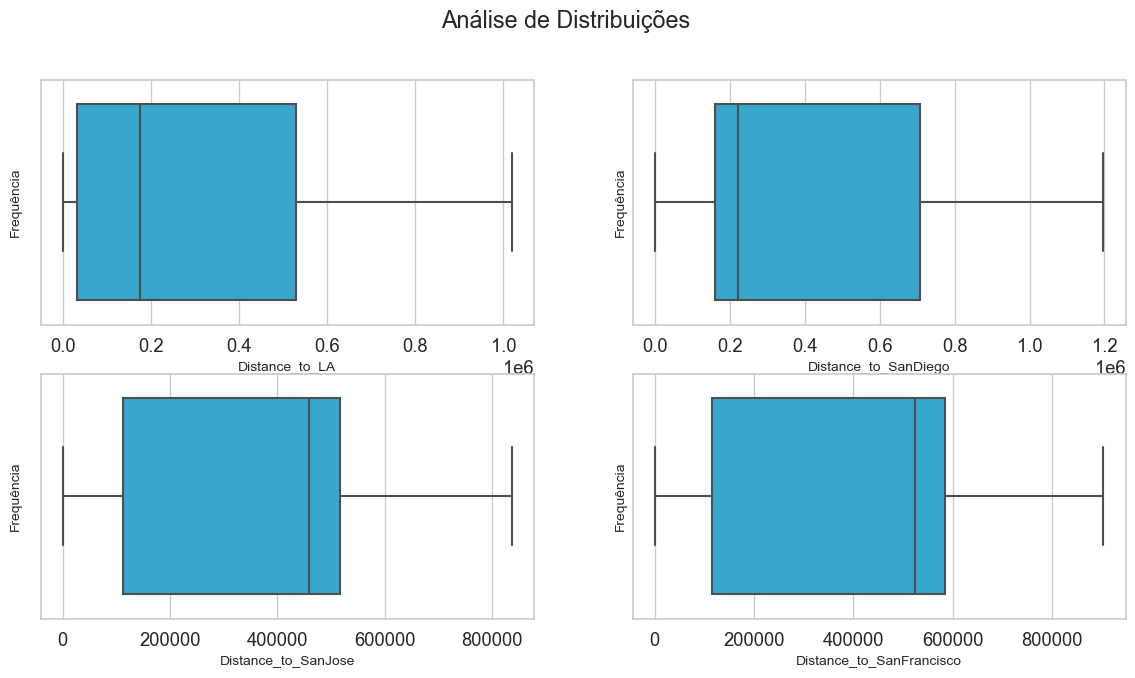

In [69]:
plota_boxplot(['Distance_to_LA','Distance_to_SanDiego','Distance_to_SanJose','Distance_to_SanFrancisco'], df_train, 2, 2, 'Análise de Distribuições')

# <font color='red' style='font-size: 40px;'> 3.0 Feature Engineer </font>
<hr style='border: 2px solid red;'>

### 3.1) Redução de Dimensionalidade 

> 1. Como a correlação entre Número de Cômodos, Número de Banheiros, Membros da Família e População era muito alta, optou-se por realizar um PCA

> 2. A nova componente explica X% das variáveis acima e seu nome pode ser colocado como "Concentração de Pessoas", pois altos números dessas variáveis significam que as moradias concentram mais pessoas

### 3.2) Clusterização das Distâncias

> 1. Notou-se que há mais cidades perto de LA e San Diego, ao passo que há mais cidades longe de San Jose e San Francisco

> 2. A análise de correlação mostrou que as distâncias de LA e San Diego são inversamente proporcionais a San Jose e San Francisco

> 3. Dada a situação, Optou-se por aplicar um modelo não-supervisionado para discretizar essas variáveis de distância a fim de criar uma nova feature binária chamada "Distância LA/San Diego", onde 1 significa moradias com distâncias pequenas até as respectivas cidades e 0 significa distâncias grandes para elas e distâncias pequenas para San Jose e San Francisco

# <font color='red' style='font-size: 40px;'> 4.0 Aplicação de Modelos de Machine Learning </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 5.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>